In [1]:
#nmpy is a built-in Library that offers n-dimensional arrays structures with an easy manipulation
import numpy as np
# io is a built-in class of scipy library: one of its methods is loadmat 
# loadmat loads a matlab structured data into a python dictionnary
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
# MinMaxScaler is preprocessing method that scales given values in the range (0,1) 
# (Data Normalization)
from sklearn.preprocessing import MinMaxScaler
# train_test_split generates a random train and test feautures 
# according to test_size parameter fixed in advance
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers , models
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
#matlab files are loaded as a python dictionnary with a "key": value structure
#the "k" key contain the array series value
mat_spike = sio.loadmat('database_spike.mat')['k']
mat_ripple = sio.loadmat('database_ripple.mat')['k']
mat_FR = sio.loadmat('database_FR.mat')['k']
mat_spike_ripple = sio.loadmat('database_spike_ripple.mat')['k']
mat_artifact = sio.loadmat('database_artifact.mat')['k']

In [3]:
#this funtion extracts the series from the data loaded and returns a list of 100 representations
def transform(data):
    liste=list()
    for i in range(10):
        for j in range (10):
            liste.append(data[i][0][0][j])
    return liste

In [4]:
liste_spike=transform(mat_spike)
liste_ripple=transform(mat_ripple)
liste_FR=transform(mat_FR)
liste_spike_ripple=transform(mat_spike_ripple)
liste_artifact=transform(mat_artifact)

In [5]:
liste_spike[0].shape

(1024, 10)

In [6]:
#collecting all the data lists in one list
data=liste_spike+liste_ripple+liste_FR+liste_spike_ripple+liste_artifact
# a list with target data label from 0 to 4
target=[j//100 for j in range(500)] 

In [7]:
data=np.array(data) #transforming the data list to a numpy array
target=np.array(target) # same for target list
data.shape

(500, 1024, 10)

In [8]:
# list that contains the target description
liste_target=["Spike","Ripple","Fast Ripple","Spike & Ripple","Artifact"] 

In [9]:
# this funtion shows a particular plot of one element of the data 
# defined by its index as well as it's target description as a title
def show(data,target,liste,index):
    plt.title(liste[target[index]])
    plt.plot(data[index])

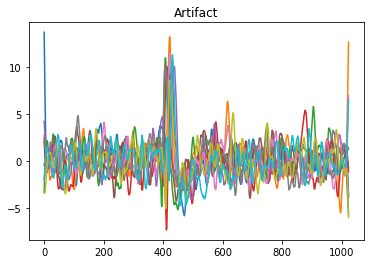

In [10]:
# ploting a random feature of the data
show(data,target,liste_target,int(random.random()*500))

In [11]:
scaler=MinMaxScaler()
# MinMaxScaler takes a 2d_array as a required input parameter
# our data is a 3d_array so we will normalize data one by one element in our 3d_array
#using the normalize_3darray funtion below
def normalize_3darray(d):
    for i in range(d.shape[0]):
        d[i]=scaler.fit_transform(d[i])
        return d

In [12]:
data=normalize_3darray(data) # data normalization

In [13]:
# spliting the data into train data and test data
# we will consider 20% of the data for the test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

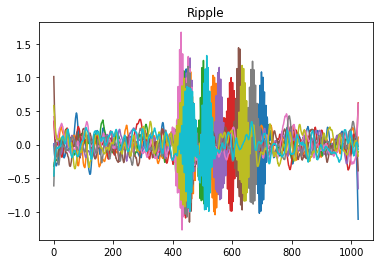

In [14]:
# plotting a random feature of the X_train data
show(X_train,y_train,liste_target,int(random.random()*400))

In [15]:
# 1d Convolutinal neural netwrok
cnn = models.Sequential ([
    # cnn
    #1d convolutional layer with 32 filters
    layers.Conv1D(filters=32,kernel_size=3,activation='relu',input_shape=(1024,10)), 
    # a maxpooling layer with pool_size=12
    layers.MaxPooling1D(pool_size=12), 
    # batchNorm layer transforms the vetors base to a better normalized and scaled second vectors base
    layers.BatchNormalization(),
    #1d convolutional layer with 64 filters
    layers.Conv1D(filters=64,kernel_size=3,activation='relu'), 
    # # a maxpooling layer with pool_size=12
    layers.MaxPooling1D(pool_size=12), 
    
    # LSTM layer
    # Long Short Term Memory chooses different implementations to maximize the performance
    layers.LSTM(5), 
    #dense layer
    # the dense layer is responsible of the prediction of each feature 
    # according to a weight formula obeying to the softmax activation funtion
    layers.Dense(5,activation="softmax") 
    ])

In [16]:
# compiling our model 
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1022, 32)          992       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 85, 32)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 85, 32)            128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 83, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 64)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 5)                 1400      
_________________________________________________________________
dense (Dense)                (None, 5)                 3

In [18]:
from keras import callbacks
#EarlyStopping stops the model fiting at the best number of epochs 
# according to the variation of loss function
# Once loss funtion is no longer decreasing, 
# EarlyStopping considers it as the best epoch to stop at
earlystopping = callbacks.EarlyStopping(monitor ="loss",
                                        mode ="auto", patience = 5)

In [19]:
# training the model
cnn.fit(X_train, y_train, epochs=200,callbacks=[earlystopping])

Epoch 1/200
13/13 [==============================] - 1s 12ms/step - loss: 1.5384 - accuracy: 0.3100
Epoch 2/200
13/13 [==============================] - 0s 10ms/step - loss: 1.3349 - accuracy: 0.4000
Epoch 3/200
13/13 [==============================] - 0s 11ms/step - loss: 1.2251 - accuracy: 0.4375
Epoch 4/200
13/13 [==============================] - 0s 11ms/step - loss: 1.1615 - accuracy: 0.4500
Epoch 5/200
13/13 [==============================] - 0s 11ms/step - loss: 1.0719 - accuracy: 0.5275
Epoch 6/200
13/13 [==============================] - 0s 10ms/step - loss: 1.0139 - accuracy: 0.5950
Epoch 7/200
13/13 [==============================] - 0s 10ms/step - loss: 0.9514 - accuracy: 0.6600
Epoch 8/200
13/13 [==============================] - 0s 9ms/step - loss: 0.9013 - accuracy: 0.7075
Epoch 9/200
13/13 [==============================] - 0s 10ms/step - loss: 0.8865 - accuracy: 0.6675
Epoch 10/200
13/13 [==============================] - 0s 10ms/step - loss: 0.8475 - accuracy: 0.7050


In [20]:
# model's evaluation
cnn.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2350 - accuracy: 0.9400


[0.2349557727575302, 0.9399999976158142]